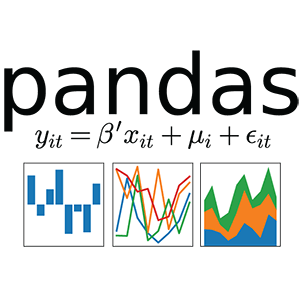

# Outlines
* Read csv file
* Write to csv
* Read excel file
* Write in excel file
* How to write 2 DataFrames in 1 excel file and 2 sheets

In [1]:
import pandas as pd

# Read csv file


In [2]:
df = pd.read_csv('D:/Data_Science/My Github/Pandas-tutorial/Document/Reading writing/stock_data.csv')
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [5]:
# you can skip header (first rows) by this code
df = pd.read_csv('D:/Data_Science/My Github/Pandas-tutorial/Document/Reading writing/stock_data.csv',
                 skiprows=1)
df

,GOOGL,27.82,87,845,larry page
0,WMT,4.61,484,65,n.a.
1,MSFT,-1,85,64,bill gates
2,RIL,not available,50,1023,mukesh ambani
3,TATA,5.6,-1,n.a.,ratan tata


In [6]:
# you can skip header (first rows) by this code (another method)
df = pd.read_csv('D:/Data_Science/My Github/Pandas-tutorial/Document/Reading writing/stock_data.csv',
                 header=1)
df

,GOOGL,27.82,87,845,larry page
0,WMT,4.61,484,65,n.a.
1,MSFT,-1,85,64,bill gates
2,RIL,not available,50,1023,mukesh ambani
3,TATA,5.6,-1,n.a.,ratan tata


**Index starts from 0 hence header=1 really means row#2 in csv file**

In [7]:
# Add extra header
df = pd.read_csv('D:/Data_Science/My Github/Pandas-tutorial/Document/Reading writing/stock_data.csv',
                 header=None)
df

,0,1,2,3,4
0,tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,n.a.
3,MSFT,-1,85,64,bill gates
4,RIL,not available,50,1023,mukesh ambani
5,TATA,5.6,-1,n.a.,ratan tata


In [8]:
# Name extra header
df = pd.read_csv('D:/Data_Science/My Github/Pandas-tutorial/Document/Reading writing/stock_data.csv',
                 header=None,names=['ticker','eps','revenue','price','people'])
df

,ticker,eps,revenue,price,people
0,tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,n.a.
3,MSFT,-1,85,64,bill gates
4,RIL,not available,50,1023,mukesh ambani
5,TATA,5.6,-1,n.a.,ratan tata


In [9]:
# What if a csv file is big and you want to read only 3 rows
df = pd.read_csv('D:/Data_Science/My Github/Pandas-tutorial/Document/Reading writing/stock_data.csv',
                 nrows=3)
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1.00,85,64,bill gates


In [10]:
# look at the main csv file again: notice that some data are not available 
df = pd.read_csv('D:/Data_Science/My Github/Pandas-tutorial/Document/Reading writing/stock_data.csv')
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [11]:
# Replace not available or n.a. by NaN in DataFrame 
df = pd.read_csv('D:/Data_Science/My Github/Pandas-tutorial/Document/Reading writing/stock_data.csv',na_values=['not available','n.a.'])
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845.0,larry page
1,WMT,4.61,484,65.0,NaN
2,MSFT,-1.00,85,64.0,bill gates
3,RIL,NaN,50,1023.0,mukesh ambani
4,TATA,5.60,-1,NaN,ratan tata


In [12]:
# There is a problem with revenue column: the value for revenue should be >=0 (i.e. -1 is wrong)
# I want to convert it to NaN. If I put -1 in the names (previous cell) it also convert -1 in eps column 
# Solution: instead of a list supply a dictionary 
df = pd.read_csv('D:/Data_Science/My Github/Pandas-tutorial/Document/Reading writing/stock_data.csv',
                na_values={
                    'eps':['not available','n.a.'],
                    'revenue':['not available','n.a.',-1],
                    'people':['not available','n.a.']
                })
df


,tickers,eps,revenue,price,people
0,GOOGL,27.82,87.0,845,larry page
1,WMT,4.61,484.0,65,NaN
2,MSFT,-1.00,85.0,64,bill gates
3,RIL,NaN,50.0,1023,mukesh ambani
4,TATA,5.60,NaN,n.a.,ratan tata


# Write to csv


In [14]:
# Before run this cell make sure you don't have new.csv in your directory
df.to_csv('D:/Data_Science/My Github/Pandas-tutorial/Document/Reading writing/new.csv',index=False)


**index=False omit index columns, because by default it write indexes 0,1,2,...**

In [15]:
# Writing only 2 columns
df.columns

Index(['tickers', 'eps', 'revenue', 'price', 'people'], dtype='object')

In [17]:
df.to_csv('D:/Data_Science/My Github/Pandas-tutorial/Document/Reading writing/new1.csv',
          index=False,columns=['tickers','eps'])


# Read excel file


In [19]:
df=pd.read_excel('D:/Data_Science/My Github/Pandas-tutorial/Document/Reading writing/stock_data.xlsx')
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [20]:
# Convert n.a. with function
import pandas as pd
def convert_people_cell(cell):
    if cell=='n.a.':
        return 'sam walton'
    return cell
df=pd.read_excel('D:/Data_Science/My Github/Pandas-tutorial/Document/Reading writing/stock_data.xlsx',converters={
    'people':convert_people_cell
})
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,sam walton
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


# Write in excel file


In [22]:
df.to_excel('D:/Data_Science/My Github/Pandas-tutorial/Document/Reading writing/new.xlsx')


In [23]:
# write in excel file from row 1 and column 2
df.to_excel('D:/Data_Science/My Github/Pandas-tutorial/Document/Reading writing/new1.xlsx',
            startrow=1,startcol=2)

# How to write 2 DataFrames in 1 excel file and 2 sheets


In [24]:
# use ExcelWriter
# first create 2 DataFrames
df_stocks = pd.DataFrame({
    'tickers':['GOOGL','WMT','MSFT'],
    'price':[845,65,64],
    'pa':[30.37,14.26,30.97],
    'eps':[27.82,4.61,2.12]
})

df_weather=pd.DataFrame({
    'day':['1/1/2017','1/2/2017','1/3/2017'],
    'temperature':[32,35,28],
    'event':['Rain','Sunny','Snow']
})

In [29]:
with pd.ExcelWriter('D:/Data_Science/My Github/Pandas-tutorial/Document/Reading writing/stocks_weather.xlsx') as writer:
    df_stocks.to_excel(writer,sheet_name='stocks')
    df_weather.to_excel(writer,sheet_name='weather')
    

[Check the link for more information about reading & writing](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#)

|  Date |  Author |   |   |
|---|---|---|---|
| 2021-07-28    |   <font color=blue>**Ehsan Zia**</font>  |  |  |

